## Name: Billy Henry
## Date: 5/8/2019
## Class: CSC-223, Spring 2019
## Final Project
## SOURCE: api.scryfall.com : Used to generate the relevant datasets in .csv format.

## Introduction:
  Magic the Gathering is a strategy card game that was created in 1993 by Richard Garfield and published by Wizards of the Coast. The game is still more popular than ever today, more than 25 years after it's creation. It can be played with 2 or more players, and the goal is to decrease your opponent's starting life total to 0 in order to win. There are other various ways of winning, with some cards having other win conditions in their text, but the main way to win is by attacking your opponent with 'creature' cards and using various other spells to outplay them and gain advantage. The game has gained even more exposure with the launch of Magic Arena, an online version of the game where you can play against opponents with virtual versions of the paper cards. 
  
  I originally started playing Magic in 2015, but took a few years off and started playing both the online game and in paper again last December. The game is competitive, strategic, and rewarding when you play well. One pretty large aspect of the game is the secondary market for cards; I am not sure if Wizards of the Coast intended for their products to be sold at higher prices on the secondary market, but I am sure it benefits their profits. This secondary market is where many Magic players buy the necessary single cards for their decks. You could just play the lottery by purchasing hundreds of booster packs of cards and hoping to get the rares and cards you need, but who has the money for all of that? 
  
  I plan to analyze some of the aspects of the 'singles market' for Magic the Gathering cards, along with trying my best to explain what the cards are and what they mean for those who are not familiar. What are the most expensive cards and why? Is it because they are exceptionally good cards, because they are more rare than others, or some other reason? Are there some types of cards that are more powerful/favored than others? Let's take a look:
  
  

### Import the functions needed for this study.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# http://api.scryfall.com/cards/search?q=cmc:7&format=csv : Default URL for Scryfall api

### Read all of the .csv files of our data sets into DataFrames

In [2]:
df1 = pd.read_csv('top_standard.csv')
df1 = df1.set_index('set')
df2 = pd.read_csv('top_commander.csv')
df2 = df2.set_index('set')
df3 = pd.read_csv('top_modern.csv')
df3 = df3.set_index('set')

### Notes on Data:
- All .csv files are created from scryfall.com. They have created an API that allows searching through a database of every Magic card ever printed. I am able to enter any search filter that I may need to get the specified cards, and export that list to a .csv file to be read in here.

- We will be looking at the top 10 most expensive cards from the 3 major playing formats: Standard, Commander, and Modern.

- Each card has a few attributes that will be displayed:
    - Rarity
        - (M)ythic Rare
        - (R)are
        - (U)ncommon
        - (C)ommon
    - Name
    - Mana Cost (How many lands need to be tapped to cast the spell) also includes color. If a color is included in the mana cost, only lands that produce that specific color may be used to pay for it. (W)hite, Bl(u)e, (B)lack, (R)ed, (G)reen.
    - Converted Mana Cost (or CMC) just adds up the amount of generic colored mana and colored mana needed to cast.
    - Type Line is the type of card it is (creature, planeswalker, artifact, enchantment, instant/sorcery, etc)
    - USD Price and USD Foil Price: the current median price of the card on the singles market, and the price of the 'foil' variant which are more rare and expensive usually.

### Filter unnecessary information out of the data frames created from the Scryfall csv files.

In [3]:
del df1['multiverse_id']
del df1['mtgo_id']
del df1['collector_number']
del df1['artist']
del df1['eur_price']
del df1['tix_price']
del df1['image_uri']
del df1['scryfall_uri']

del df2['multiverse_id']
del df2['mtgo_id']
del df2['collector_number']
del df2['artist']
del df2['eur_price']
del df2['tix_price']
del df2['image_uri']
del df2['scryfall_uri']

del df3['multiverse_id']
del df3['mtgo_id']
del df3['collector_number']
del df3['artist']
del df3['eur_price']
del df3['tix_price']
del df3['image_uri']
del df3['scryfall_uri']

### Top 10 Standard Cards:

Standard is the most widely accessible format of Magic the Gathering. It is a continuously rotating format; new sets of cards are released every 3-4 months. These cards are all added into Standard when they release, and then are rotated out after about 21 months. There are always between 5-8 expansion sets in Standard play at a time. In Standard, each player has a 60 card deck consisting of 20-24 land cards and the rest a variety of spells. A max of 2 players may be playing against each other at one time. Below are the top 10 most expensive cards that are currently standard legal as of 5/6/2019:

In [4]:
df1.sort_values('USD Price', ascending=False)
df1[0:10]

,Rarity,Name,Mana Cost,Converted Mana Cost,Type Line,USD Price,USD Foil Price
set,,,,,,,
DOM,M,"Teferi, Hero of Dominaria",{3}{W}{U},5.0,Legendary Planeswalker — Teferi,37.28,83.00
WAR,M,"Liliana, Dreadhorde General",{4}{B}{B},6.0,Legendary Planeswalker — Liliana,27.29,54.99
M19,M,"Nicol Bolas, the Ravager // Nicol Bolas, the A...",{1}{U}{B}{R},4.0,Legendary Creature — Elder Dragon // Legendary...,26.58,52.60
WAR,M,"Nicol Bolas, Dragon-God",{U}{B}{B}{B}{R},5.0,Legendary Planeswalker — Bolas,23.79,62.97
RIX,M,The Immortal Sun,{6},6.0,Legendary Artifact,22.28,42.25
M19,M,Nexus of Fate,{5}{U}{U},7.0,Instant,NaN,19.25
WAR,M,God-Eternal Kefnet,{2}{U}{U},4.0,Legendary Creature — Zombie God,17.95,31.55
RNA,M,Hydroid Krasis,{X}{G}{U},2.0,Creature — Jellyfish Hydra Beast,17.62,30.05
DOM,M,"Karn, Scion of Urza",{4},4.0,Legendary Planeswalker — Karn,17.37,39.11


### Analysis:

   While looking at this data might seem like gibberish to someone who is not familiar with Magic the Gathering, it is pretty simple to understand. Every card in Magic has a couple of attributes; a name, rarity level, type, set that it was printed in, mana cost, and effect text. Most of these are self explanatory. Looking at the above data, we can see a large trend of 'Legendary Planeswalker' cards in the top 10, with 4 of them sharing that type. These are very powerful cards in the game; most of them cost a lot of mana to play so it takes a bit of time to play them, but when they come out they can easily swing the game in your favor. It makes sense that they would currently be among the most expensive cards, especially due to the release of the new set War of the Spark (WAR), which introduced 36 total new Planeswalkers. This has never been done before, and it is going to have a lasting effect on the standard meta-game and secondary market for months to come. I expect to see cards from WAR decrease in value slightly before leveling out, as they are still brand new cards that will become more easily avaliable as time goes on.

   - An important thing to note is that the cards in standard will tend to fluctuate in value the most compared to other formats. Standard is always changing and adapting, as some cards become obsolete and others are discovered to be stronger than they once were. I expect this list to frequently change if I were to look at it in a week or so.
   
   - Another thing to note about these cards are that they are all Mythic rarity. Mythic rare cards are the hardest to come by, as they only have a small perecentage of being opened in a booster pack. This definitely has a part in the high value of these cards.
   
   - Note: Nexus of Fate only has a foil variant because it was a promotional card for the Magic Core Set 2019.

### Top 10 Commander Cards:

Commander is a completely different format than Standard. Anywhere from 2+ players can be in a game at anytime. Each player builds a 99 card deck, with 1 card designated as the 'commander' of the deck. The commander must be a legendary creature, and it is always able to be played instead of being shuffled into your deck. Most cards in Magic the Gathering history are commander legal, so here is the top 10:

In [5]:
df2.sort_values('USD Price', ascending=False)
df2[0:10]

,Rarity,Name,Mana Cost,Converted Mana Cost,Type Line,USD Price,USD Foil Price
set,,,,,,,
LEG,R,The Tabernacle at Pendrell Vale,NaN,0.0,Legendary Land,1592.65,NaN
ATQ,R,Mishra's Workshop,NaN,0.0,Land,1500.00,NaN
LEB,R,Timetwister,{2}{U},3.0,Sorcery,1483.85,NaN
ARN,U,Bazaar of Baghdad,NaN,0.0,Land,1399.99,NaN
ARN,R,Juzám Djinn,{2}{B}{B},4.0,Creature — Djinn,1250.00,NaN
LEG,R,The Abyss,{3}{B},4.0,World Enchantment,1200.00,NaN
ATQ,R,Candelabra of Tawnos,{1},1.0,Artifact,799.99,NaN
LEG,R,Moat,{2}{W}{W},4.0,Enchantment,774.99,NaN
LEG,R,Chains of Mephistopheles,{1}{B},2.0,Enchantment,742.24,NaN


### Analysis:

- As you can see, this list includes cards that are exponentially more expensive currently than those in Standard. Many of these cards are vintage-style Magic cards that were printed 20+ years ago. 
- These cards hold enormous value to players who can afford them, as they are a part of Magic history and will most likely not be reprinted in future sets. 
- 4 of these cards are lands, that after some research on my part, have some broken effects that give players who have these cards way more advantage on winning the game than those who do not. That factor combined with the vintage quality of the cards is why they are so expensive, and I expect them to hold this value for years to come.

### Top 10 Modern Cards:

Modern is sort of a middle-ground in terms of playable cards between Standard and Commander. It includes every set after and including Mirrodin which was printed in 2003. This leaves some of the more vintage cards out, but there is still a ton of value in Modern. The play style is similar to Standard; 1 on 1, 60 card decks. Here are the most expensive cards in the format as of 5/6/2019:

In [6]:
df3.sort_values('USD Price', ascending=False)
df3[0:10]

,Rarity,Name,Mana Cost,Converted Mana Cost,Type Line,USD Price,USD Foil Price
set,,,,,,,
EMA,M,"Jace, the Mind Sculptor",{2}{U}{U},4.0,Legendary Planeswalker — Jace,113.77,170.52
MM3,R,Scalding Tarn,NaN,0.0,Land,93.22,124.15
MM2,M,Mox Opal,{0},0.0,Legendary Artifact,88.73,107.41
MM3,M,Liliana of the Veil,{1}{B}{B},3.0,Legendary Planeswalker — Liliana,74.88,121.75
ZEN,R,Verdant Catacombs,NaN,0.0,Land,71.74,135.09
FRF,M,"Ugin, the Spirit Dragon",{8},8.0,Legendary Planeswalker — Ugin,69.31,155.27
MMA,M,Dark Confidant,{1}{B},2.0,Creature — Human Wizard,69.15,81.14
MM3,R,Misty Rainforest,NaN,0.0,Land,68.55,90.02
MBS,M,Blightsteel Colossus,{12},12.0,Artifact Creature — Golem,62.85,144.08


### Analysis:

- It seems prices are a lot lower than the cards legal in commander because none of these are vintage cards.
- 4 lands again. Many lands are in all 3 of these top 10 lists because they are versatile cards, essential to most competitive decks.
- 3 planeswalkers. Jace, Ugin, and Liliana are notoriously powerful cards in all formats that they are legal in. These cards will hold value for many years.
- Note the set types; any 'MM' set is a Masters set, which are always full of reprints of older cards that are popular. These cards take up much of this top 10 list, because they are powerful cards that are sought after.
- Also note: land cards do not have a mana cost. One land can be played each turn, and can then be used to produce mana of different colors.

### Graphing:

In order to see more easily how the prices of these cards stack up against each other, we can graph them side by side and compare:

### Join the top 10 list from each DataFrame into one larger DF using pd.concat. Delete extraneous columns.

In [7]:
graphDF1 = df1[0:10]
graphDF2 = df2[0:10]
graphDF3 = df3[0:10]

frames = [graphDF1,graphDF2,graphDF3]
result = pd.concat(frames)

del result['Converted Mana Cost']
del result['USD Foil Price']

frames2 = [graphDF1, graphDF3]
result2 = pd.concat(frames2)

del result2['Converted Mana Cost']
del result2['USD Foil Price']

### Graph each card's name and price on a bar chart side by side to compare.

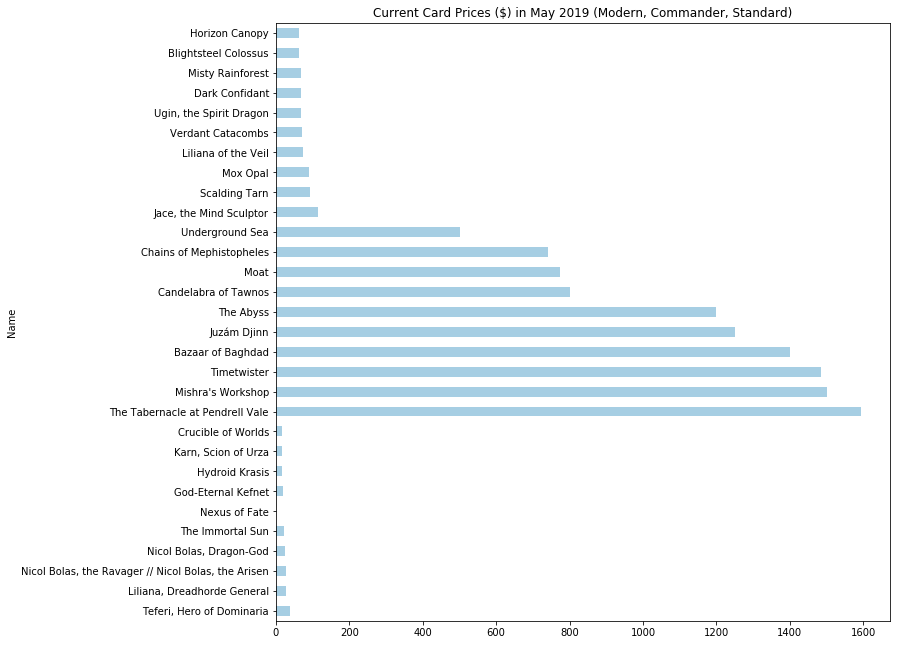

In [8]:
result.plot.barh(x='Name', y='USD Price', stacked=True, title = 'Current Card Prices ($) in May 2019 (Modern, Commander, Standard)', figsize = (11,11), legend = False, colormap = 'Paired');

### Analysis:

- This is a bit easier to look at than the tables, it allows visualization of exactly how much the prices differ between the cards. The top cards from Commander, the middle 10 bars, are far more expensive than the ones from Standard and Modern.
- These are not the foil prices, so as you can see Nexus of Fate again does not have a price for a normal print.

### Standard vs. Modern Top 10:

All of the Commander card prices make it hard to compare Standard and Modern side by side, so here is another graph depicting just the prices of the top 10 cards from Standard and Modern:

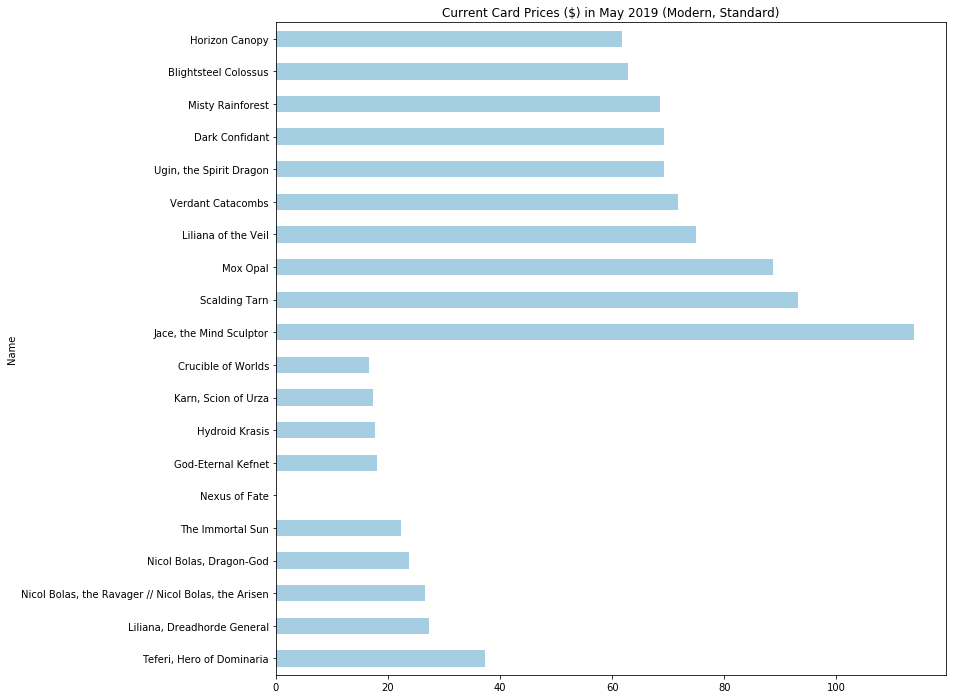

In [9]:
result2.plot.barh(x='Name', y='USD Price', stacked=True, title = 'Current Card Prices ($) in May 2019 (Modern, Standard)', figsize = (12,12), legend = False, colormap = 'Paired');

- These cards are closer in value, but with this closer up view it is easy to see that all of the cards from Modern (the top 10) are more expensive than any of the cards in Standard.

### Question: Does the card type have any effect on overall price?

- From the above tables and graphs, we can assume that the rarity of a card and its format legality have a large influence on the price of a card. 
- However, does the card type have any influence on price? We can expand our datasets to further look at this:

### Take the top 100 cards from each format as the sample. Next, we group the data by 'Type Line' in order to get a count for each type.

- ***Note about the data***
    - The same .csv files used above will be used in this next set of data groups. However, copies were made of each csv file in order to preserve the above data. I manually edited the 'Type Line' to contain one word (either Planeswalker, Artifact, Creature, Land, Enchantment, Instant, or Sorcery) in order to be able to groupby the data more efficiently without having extraneous text barring us from displaying the data this way. We will also be looking at the top 100 expensive cards in each format instead of the top 10 only.

### Grab data from modified .csv files, erase extra data to only keep the top 100 cards from each data frame. Then, use the .groupby function to get the counts for each card type in the data set. Then graph the data categorically by the 'Type Line'.

In [10]:
top100S = pd.read_csv('top_standard(2).csv')
top100S = top100S[0:100]
top100S = top100S.groupby('Type Line').count()
top100C = pd.read_csv('top_commander(2).csv')
top100C = top100C[0:100]
top100C = top100C.groupby('Type Line').count()
top100M = pd.read_csv('top_modern(2).csv')
top100M = top100M[0:100]
top100M = top100M.groupby('Type Line').count()

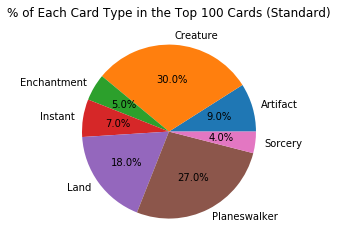

In [11]:
plt.pie(top100S['Name'], labels = top100S.index, autopct='%1.1f%%')
plt.title('% of Each Card Type in the Top 100 Cards (Standard)');

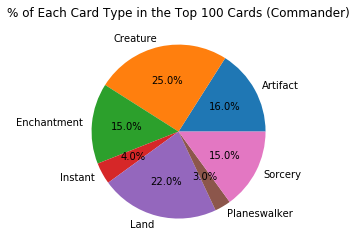

In [12]:
plt.pie(top100C['Name'], labels = top100C.index, autopct='%1.1f%%')
plt.title('% of Each Card Type in the Top 100 Cards (Commander)');

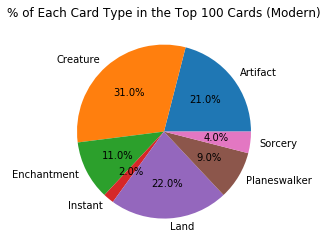

In [13]:
plt.pie(top100M['Name'], labels = top100M.index, autopct='%1.1f%%')
plt.title('% of Each Card Type in the Top 100 Cards (Modern)');

### Analysis:

- By looking at these 3 pie charts, it seems that there is a very similar distribution of card types in the Top 100 across all 3 formats.
- Creatures are the most prevalent expensive cards in all formats, which is expected. The most popular way of playing the game is with creatures, so I expected them to have the highest frequency.
- In Standard, Planeswalkers are the second highest frequency. This is expected at this particular point in time with War of the Spark re-popularizing Planeswalkers as viable cards. I expect this number to drop quickly as time goes on. A small number of PW's are currently in Modern and Commander, contrastly.
- Lands also take up about 1/4 of each format's top cards. This is fitting, as the average deck is about 30-40% land in any format. Without lands, there are no ways to play spells, so having plenty of versatile, useful land cards makes a deck more competitively viable.
- Instant and Sorcery cards take up lower percentages of the expensive cards. While they are good inclusions in almost any deck, they are usually only playable one time and they don't always have a lasting effect on the game. Most of them have an immediate, good effect, and then that's it. This may be why they are generally cheaper cards.

###  Conclusion:

There are a number of conclusions I can make about the singles market at the moment based on this data:

- Standard is currently the cheapest format to play in with good cards. Their top cards are cheaper than most good cards in Commander and Modern.
    - There are currently only 7 sets that are standard legal. These are the 7 newest sets, and are all still being printed by Wizards of the Coast, so it makes sense for these cards to be cheaper.
- Commander has some of the most expensive Magic cards ever printed. This is mainly because Commander legal cards include the widest variety of sets, including vintage sets where card prices are astronomical.
- Modern is the middle ground between Commander as the ceiling and Standard as the floor. Cards in Modern will ultimately be more expensive than Standard, however.
    - I think the main reason for this is print availability. While cards in Standard may be as good as some of the cards in Modern, the Modern cards are not being printed anymore and therefore have a higher demand and market value.
- Card type does seem to have a marginally small effect on the price of a card. Creature cards are large portions of the top 100 expensive cards in each format; I believe this mainly is due to the fact that creature cards are the most common spells in Magic, and there is a good chance that a lot of creatures will be among the best cards. 
- There are land cards, for example, from the Commander legal list that are exponentially more expensive than any of the other cards in the other formats. Commander prices are largely affected by the price of older, more vintage cards, which are collector's items and very expensive.
- Rarity does play a part in a card's value; mythic rare cards make up the majority of these lists, followed by rares and then a select few uncommons and commons.